## Introduction

This project is to prove to my friend in Flushing, NYC that Seattle does not rain every day and is comparable to NYC, perhaps even having less precipitation than NYC.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and New York (or other locations of interest) for the 3 year period January 2020 - January 2024.

I have already obtained the data. The data are available at this [github repository](https://github.com/galenegan/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `ny_rain.csv`.

Loading the Seattle data set.

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

Loading the New York data set.

In [ ]:
df_nyc = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

## Exploring the Contents of the Datasets

In [ ]:
# A gander at first 10 rows of Seattle's dataframe.
df_seattle.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,121.3,2020-01-01,NaN,NaN,0.15,NaN,NaN,NaN,NaN
6,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
7,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,112.5,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
8,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
9,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN


In [ ]:
# A gander at Seattle's Quick Stats.
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [ ]:
# A gander at first 10 rows of NYC's dataframe.
df_nyc.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN
5,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.763900,2.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
6,US1NYSF0089,"AMITYVILLE 0.1 WSW, NY US",40.668899,-73.418342,3.7,2020-01-01,NaN,NaN,0.02,NaN,NaN,NaN,NaN
7,US1NYNS0007,"FLORAL PARK 0.4 W, NY US",40.723000,-73.710999,24.1,2020-01-01,NaN,NaN,0.01,NaN,NaN,NaN,NaN
8,US1NYSF0061,"CENTERPORT 0.9 SW, NY US",40.891689,-73.383133,53.6,2020-01-01,NaN,NaN,0.03,NaN,NaN,NaN,NaN
9,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.763900,2.7,2020-01-02,NaN,NaN,0.00,0.0,0.0,NaN,NaN


In [ ]:
# A gander at NYC's Quick Stats.
df_nyc.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


## Checking that the columns are equivalent.

In [ ]:
set(df_seattle.columns) == set(df_nyc.columns)

True

## Checking types.

In [ ]:
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [ ]:
df_nyc.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

## Converting data types.

**Changing Date from an object to a time.**

In [ ]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [ ]:
df_nyc["DATE"] = pd.to_datetime(df_nyc["DATE"])
df_nyc.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

**Checking the shape and general info of both dataframes.**

In [ ]:
df_seattle.shape

(7003, 13)

In [ ]:
df_nyc.shape

(17465, 13)

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [ ]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    17465 non-null  object        
 1   NAME       17465 non-null  object        
 2   LATITUDE   17465 non-null  float64       
 3   LONGITUDE  17465 non-null  float64       
 4   ELEVATION  17465 non-null  float64       
 5   DATE       17465 non-null  datetime64[ns]
 6   DAPR       155 non-null    float64       
 7   MDPR       151 non-null    float64       
 8   PRCP       17275 non-null  float64       
 9   SNOW       11508 non-null  float64       
 10  SNWD       6318 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.7+ MB


**Removing columns.**

In [ ]:
# From the info above, I only care about the station, its name, the date, and precipitation. Lets remove the others.
bad_cols = ["LATITUDE", "LONGITUDE", "ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=bad_cols)
df_nyc = df_nyc.drop(columns=bad_cols)

## Visual comparison of the two dataframes.

(0.0, 10.0)

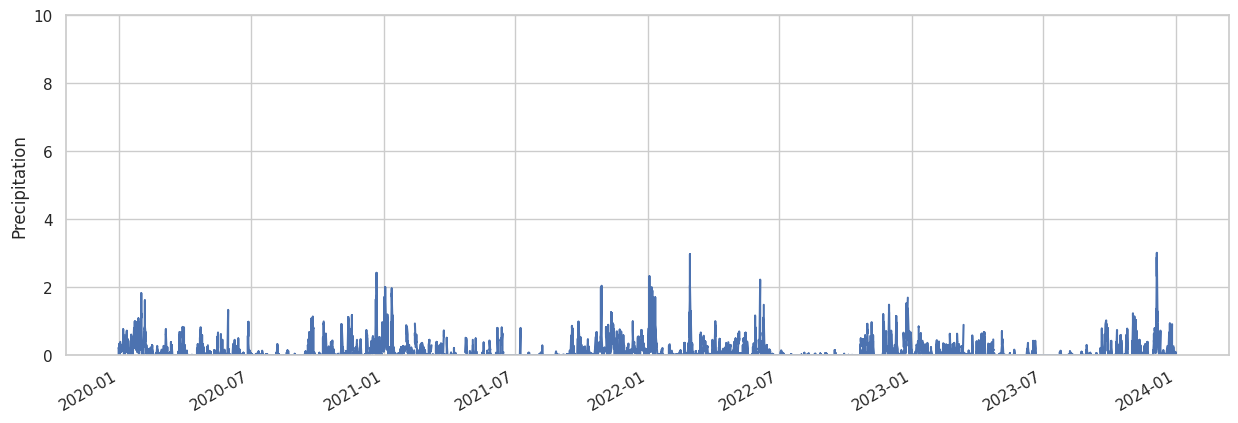

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_seattle["DATE"], df_seattle["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

(0.0, 10.0)

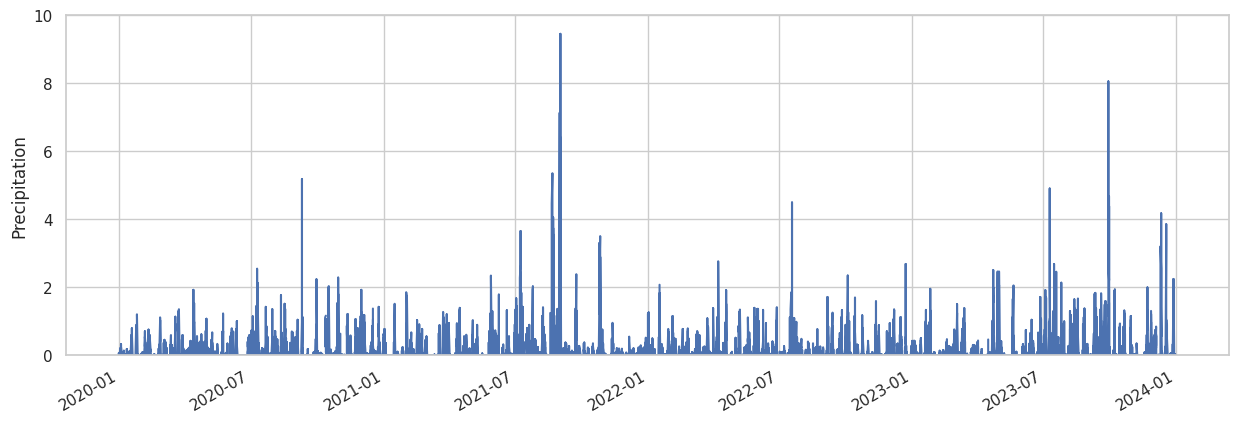

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_nyc["DATE"], df_nyc["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

## Rechecking dataframe info.

In [ ]:
print(df_seattle.info())
print()
print(df_nyc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  7003 non-null   object        
 1   NAME     7003 non-null   object        
 2   DATE     7003 non-null   datetime64[ns]
 3   PRCP     6718 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 219.0+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  17465 non-null  object        
 1   NAME     17465 non-null  object        
 2   DATE     17465 non-null  datetime64[ns]
 3   PRCP     17275 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 545.9+ KB
None


In [ ]:
df_seattle.info()
print()
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  7003 non-null   object        
 1   NAME     7003 non-null   object        
 2   DATE     7003 non-null   datetime64[ns]
 3   PRCP     6718 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 219.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  17465 non-null  object        
 1   NAME     17465 non-null  object        
 2   DATE     17465 non-null  datetime64[ns]
 3   PRCP     17275 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 545.9+ KB


## Dealing with the station number mismatch.


In [ ]:
# I want the average of all stations for each day.
df_seattle_avg = df_seattle.groupby(by="DATE", as_index=False)["PRCP"].mean()
df_nyc_avg = df_nyc.groupby(by="DATE", as_index=False)["PRCP"].mean()
# This will omit all columns except "DATE" and "PRCP".

In [ ]:
# General info of the Seattle avg.
print(df_seattle_avg.head(10))
print()
print(df_seattle_avg.info())

        DATE      PRCP
0 2020-01-01  0.162500
1 2020-01-02  0.181250
2 2020-01-03  0.267500
3 2020-01-04  0.172000
4 2020-01-05  0.168571
5 2020-01-06  0.233333
6 2020-01-07  0.511111
7 2020-01-08  0.042500
8 2020-01-09  0.060000
9 2020-01-10  0.167778

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


In [ ]:
# General info of the NYC avg.
print(df_nyc_avg.head(10))
print()
print(df_nyc_avg.info())

        DATE      PRCP
0 2020-01-01  0.013333
1 2020-01-02  0.000000
2 2020-01-03  0.134444
3 2020-01-04  0.200000
4 2020-01-05  0.040000
5 2020-01-06  0.017778
6 2020-01-07  0.010000
7 2020-01-08  0.033333
8 2020-01-09  0.001111
9 2020-01-10  0.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


We can see that there are 1461 entries for both Seattle and NYC.

Over 4 years there should be

$$4 \times 365 + 1 = 1461$$

days. Checks out.

However, there appears to be a day where no stations in Seattle recorded precipitation.

In [ ]:
#df_seattle_avg

# We can convert the dataframe above to interactive table and filter by searching "nan" in all fields.
# We can see that 2023-11-25 is the day that no stations recorded precipitation.

# We will fix this later by interpolation.

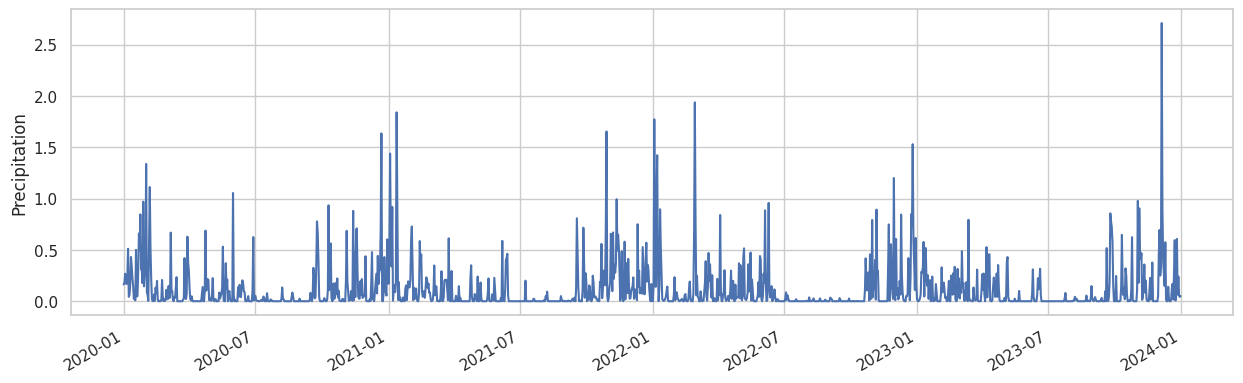

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_seattle_avg["DATE"], df_seattle_avg["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 4.5)

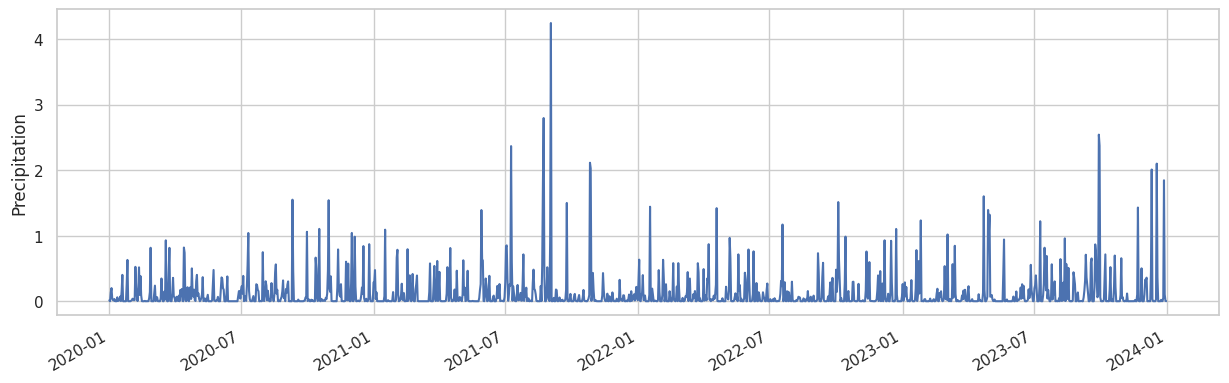

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_nyc_avg["DATE"], df_nyc_avg["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 4.5)

## Tutorial on joins

In [ ]:
df1 = pd.DataFrame({'day':[1, 2, 3, 4, 5], 'prcp':[0.1, 0.2, 0.3, 0.4, 0.5 ]})
df1

,day,prcp
0,1,0.1
1,2,0.2
2,3,0.3
3,4,0.4
4,5,0.5


In [ ]:
df2 = pd.DataFrame({'day':[1, 3, 5, 7], 'prcp':[1.1, 1.3, 1.5, 1.7]})
df2

,day,prcp
0,1,1.1
1,3,1.3
2,5,1.5
3,7,1.7


Join using the keys from only one DataFrame (the left one).

In [ ]:
df1.merge(df2, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


In [ ]:
df2.merge(df1, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,1.1,0.1
1,3,1.3,0.3
2,5,1.5,0.5
3,7,1.7,NaN


Join using the keys from both DataFrames.

In [ ]:
df1.merge(df2, on = 'day', how = 'outer')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5
5,7,NaN,1.7


Join using the keys that are common to the DataFrames.

In [ ]:
df1.merge(df2, on = 'day', how = 'inner')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,3,0.3,1.3
2,5,0.5,1.5


## Join dataframes keeping `DATE` and `PRCP` columns

**What type of join should we do?**

In [ ]:
# Just in case, I want to drop any duplicate dates.
df_nyc = df_nyc_avg.drop_duplicates(subset="DATE")
df_seattle = df_seattle_avg.drop_duplicates(subset="DATE")

In [ ]:
# Compare both dataframes' info.
print(df_nyc.info())
print()
print(df_seattle.info())
# We can see that there were no duplicates to drop from the code above.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


In [ ]:
# Merging left with NYC on the left.
df = df_nyc_avg.merge(df_seattle, on="DATE", how="left")

In [ ]:
# Check the dataframe's info.
print(df)
print()
print(df.info())

           DATE    PRCP_x    PRCP_y
0    2020-01-01  0.013333  0.162500
1    2020-01-02  0.000000  0.181250
2    2020-01-03  0.134444  0.267500
3    2020-01-04  0.200000  0.172000
4    2020-01-05  0.040000  0.168571
...         ...       ...       ...
1456 2023-12-27  0.051538  0.063333
1457 2023-12-28  1.845000  0.240000
1458 2023-12-29  0.103571  0.055000
1459 2023-12-30  0.006429  0.042500
1460 2023-12-31  0.000714  0.050000

[1461 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP_x  1461 non-null   float64       
 2   PRCP_y  1460 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 34.4 KB
None


Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. I will modify these column names later when I convert the dataframe to a tidy format.

## Tutorial on tidy data

In [ ]:
df_join = df1.merge(df2, on = 'day', how = 'left')

df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


Precipitation values are distributed across 2 columns, one for each city. A tidy data set has one column for each variable.

**What would a tidy (or long) version of this data set look like?**

<pre>



















</pre>

In [ ]:
df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


In [ ]:
df_tidy = pd.melt(df_join, id_vars = 'day', var_name = 'CITY', value_name = 'PRCP')

df_tidy

,day,CITY,PRCP
0,1,prcp_x,0.1
1,2,prcp_x,0.2
2,3,prcp_x,0.3
3,4,prcp_x,0.4
4,5,prcp_x,0.5
5,1,prcp_y,1.1
6,2,prcp_y,NaN
7,3,prcp_y,1.3
8,4,prcp_y,NaN
9,5,prcp_y,1.5


Rename the city values

In [ ]:
df_tidy.loc[df_tidy['CITY'] == 'prcp_x','CITY'] = 'city 1'

df_tidy.loc[df_tidy['CITY'] == 'prcp_y','CITY'] = 'city 2'

In [ ]:
df_tidy

,day,CITY,PRCP
0,1,city 1,0.1
1,2,city 1,0.2
2,3,city 1,0.3
3,4,city 1,0.4
4,5,city 1,0.5
5,1,city 2,1.1
6,2,city 2,NaN
7,3,city 2,1.3
8,4,city 2,NaN
9,5,city 2,1.5


## Creating a tidy dataframe with columns for city and precipitation.

In [ ]:
df_tidy = pd.melt(df, id_vars="DATE", value_name="PRCP", var_name="CITY")

In [ ]:
print(df_tidy)
print()
print(df_tidy.info())

           DATE    CITY      PRCP
0    2020-01-01  PRCP_x  0.013333
1    2020-01-02  PRCP_x  0.000000
2    2020-01-03  PRCP_x  0.134444
3    2020-01-04  PRCP_x  0.200000
4    2020-01-05  PRCP_x  0.040000
...         ...     ...       ...
2917 2023-12-27  PRCP_y  0.063333
2918 2023-12-28  PRCP_y  0.240000
2919 2023-12-29  PRCP_y  0.055000
2920 2023-12-30  PRCP_y  0.042500
2921 2023-12-31  PRCP_y  0.050000

[2922 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2922 non-null   datetime64[ns]
 1   CITY    2922 non-null   object        
 2   PRCP    2921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB
None


Now the dataframe is "tidy" or "long".

In [ ]:
df_tidy

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.013333
1,2020-01-02,PRCP_x,0.000000
2,2020-01-03,PRCP_x,0.134444
3,2020-01-04,PRCP_x,0.200000
4,2020-01-05,PRCP_x,0.040000
...,...,...,...
2917,2023-12-27,PRCP_y,0.063333
2918,2023-12-28,PRCP_y,0.240000
2919,2023-12-29,PRCP_y,0.055000
2920,2023-12-30,PRCP_y,0.042500


### Renaming columns and values.

Renaming the city values "NYC" and "SEA".

In [ ]:
df_tidy.loc[df_tidy["CITY"] == "PRCP_x", "CITY"] = "NYC"
df_tidy.loc[df_tidy["CITY"] == "PRCP_y", "CITY"] = "SEA"
print(df_tidy)

           DATE CITY      PRCP
0    2020-01-01  NYC  0.013333
1    2020-01-02  NYC  0.000000
2    2020-01-03  NYC  0.134444
3    2020-01-04  NYC  0.200000
4    2020-01-05  NYC  0.040000
...         ...  ...       ...
2917 2023-12-27  SEA  0.063333
2918 2023-12-28  SEA  0.240000
2919 2023-12-29  SEA  0.055000
2920 2023-12-30  SEA  0.042500
2921 2023-12-31  SEA  0.050000

[2922 rows x 3 columns]


Renaming the columns to be lowercase and more easily understood using `df.rename()`.

In [ ]:
mapping_dict = {"DATE":"date", "CITY":"city", "PRCP":"precipitation"}

In [ ]:
df_tidy_rename = df_tidy.rename(columns=mapping_dict)

In [ ]:
df_tidy_rename

,date,city,precipitation
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


## Deal with missing values

In [ ]:
# Check the info of our dataframe again.
df_tidy_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


<Axes: >

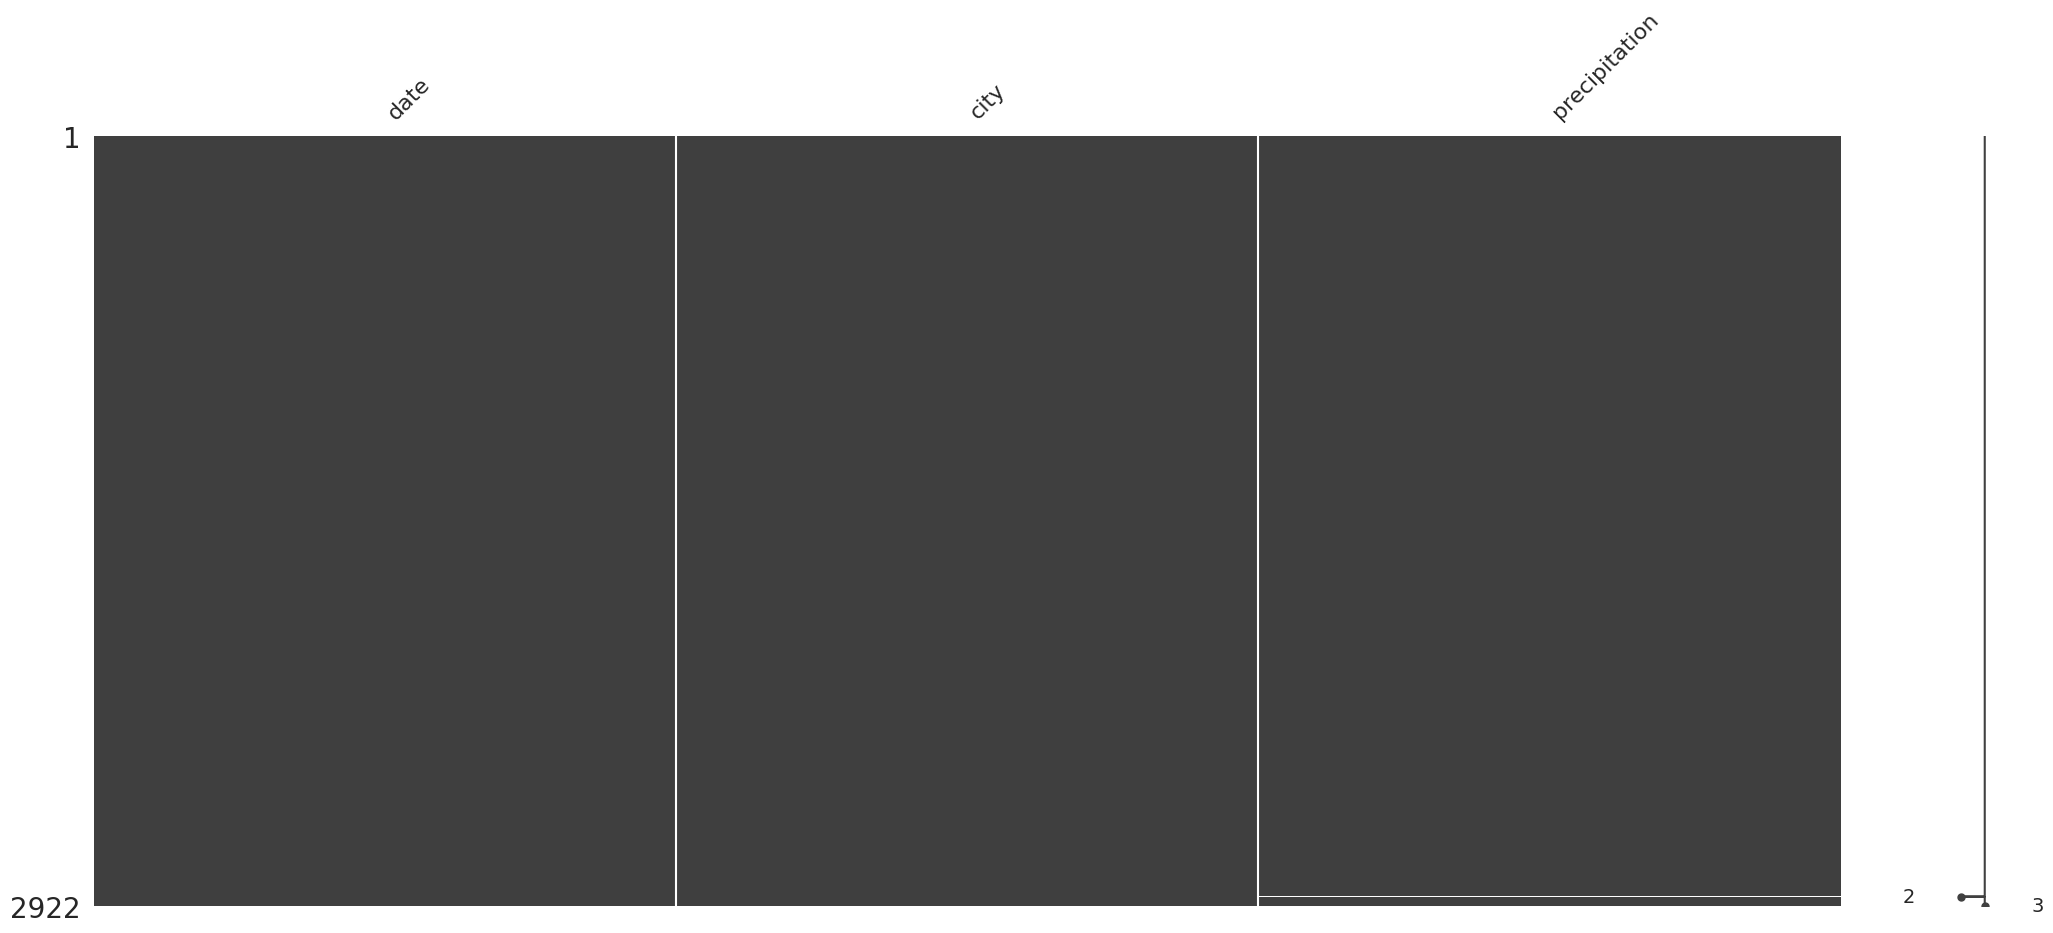

In [ ]:
# We can see where we may be missing data.
msno.matrix(df_tidy_rename)

Recall that there was a day in Seattle where there were no precipitation recordings. We can see this towards the bottom of the precipitation column.

## Impute missing values
Let's fix this NaN.

In [ ]:
# Linear interpolation is probably the simplest approach
df_tidy_rename["precipitation"] = df_tidy_rename["precipitation"].interpolate()

In [ ]:
# This tells us how many NaNs are in the new "precipitation" column.
df_tidy_rename["precipitation"].isna().sum()
# NaNs no longer in the dataframe.

0

In [ ]:
# Last check of the dataframe.
df_tidy_rename

,date,city,precipitation
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


## Exporting the clean .csv file.

In [ ]:
df_tidy_rename.to_csv('/content/drive/My Drive/Colab Notebooks/Seattle_Weather/clean_seattle_nyc_weather.csv', index=False)

In [ ]:
# Verifies that the csv file was properly exported.
df_verify = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Seattle_Weather/clean_seattle_nyc_weather.csv')
print(df_verify)

            date city  precipitation
0     2020-01-01  NYC       0.013333
1     2020-01-02  NYC       0.000000
2     2020-01-03  NYC       0.134444
3     2020-01-04  NYC       0.200000
4     2020-01-05  NYC       0.040000
...          ...  ...            ...
2917  2023-12-27  SEA       0.063333
2918  2023-12-28  SEA       0.240000
2919  2023-12-29  SEA       0.055000
2920  2023-12-30  SEA       0.042500
2921  2023-12-31  SEA       0.050000

[2922 rows x 3 columns]
